In [47]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
	per species). Each mushroom is identified as definitely edible, definitely poisonous, or of 
	unknown edibility and not recommended (the latter class was combined with the poisonous class).
	Of the 20 variables, 17 are nominal and 3 are metrical.

  https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GB_ML_Busines/Lection6/MushroomDataset/secondary_data.csv', delimiter=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [49]:
df.shape

(61069, 21)

In [50]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [51]:
df.loc[df['class'] == 'p', 'class'] = 0
df.loc[df['class'] == 'e', 'class'] = 1
df['class'].unique()

array([0, 1], dtype=object)

In [52]:
df['class'].value_counts()

0    33888
1    27181
Name: class, dtype: int64

In [53]:
df['gill-spacing'].unique()

array([nan, 'c', 'd', 'f'], dtype=object)

In [54]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [55]:
df.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], axis=1, inplace=True)

In [56]:
features = df.columns.to_list()

In [57]:
for feature in features:
  df.loc[df[feature].isna(), feature] = 'NNN'

In [58]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,15.26,x,g,o,f,e,NNN,w,16.95,17.09,y,w,t,g,d,w
1,0,16.6,x,g,o,f,e,NNN,w,17.99,18.19,y,w,t,g,d,u
2,0,14.07,x,g,o,f,e,NNN,w,17.8,17.74,y,w,t,g,d,w
3,0,14.17,f,h,e,f,e,NNN,w,15.77,15.98,y,w,t,p,d,w
4,0,14.64,x,h,o,f,e,NNN,w,16.53,17.2,y,w,t,p,d,w


In [59]:
continues_cols = ['cap-diameter', 'stem-height', 'stem-width']
for col in continues_cols:
  df[col] = df[col].astype('float')


df['class'] = df['class'].astype('int')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          61069 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

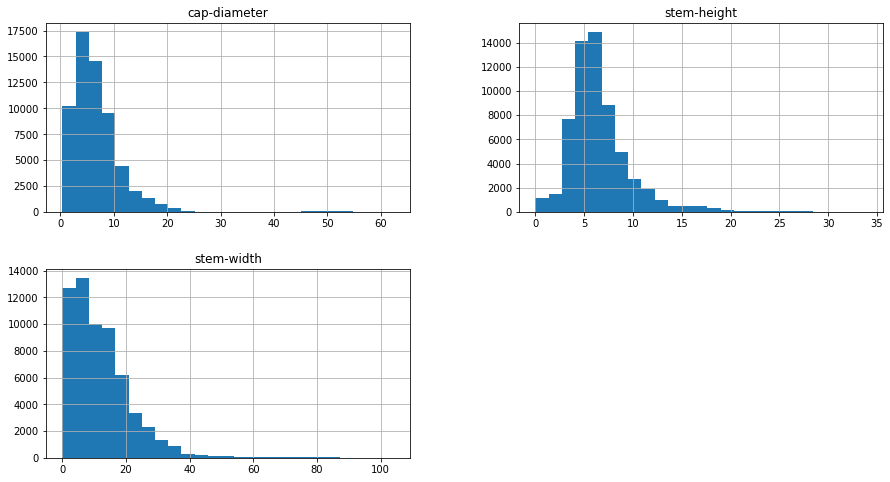

In [61]:
df[continues_cols].hist(figsize=(15,8), bins=25);

In [62]:
df.sample(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
51834,1,18.25,p,d,o,f,p,NNN,w,14.98,35.02,y,w,f,f,d,u
54141,0,6.48,s,d,y,f,d,c,o,3.39,6.88,NNN,o,f,f,h,u
21720,1,7.08,f,NNN,y,f,a,c,w,6.22,14.81,NNN,g,f,f,d,u
7127,0,3.01,s,s,w,f,d,c,w,2.91,7.25,NNN,w,f,f,g,a
47300,0,1.57,x,NNN,n,f,NNN,NNN,k,5.30,2.48,s,n,f,f,g,a


# FE

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', 1), 
                                                df['class'],                                                                       
                                                test_size=0.3, random_state=42)


In [64]:
y_train

60500    1
932      0
28092    0
37517    0
26695    0
        ..
54343    0
38158    0
860      0
15795    0
56422    0
Name: class, Length: 42748, dtype: int64

In [65]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [66]:
cat_cols = ['cap-shape', 'cap-surface', 'cap-color', 
             'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 
             'gill-color', 'stem-surface', 
             'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

continuos_transformers = []
cat_transformers = []

for cont_col in continues_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))

In [67]:
feats = FeatureUnion(continuos_transformers+cat_transformers)
feature_processing = Pipeline([('feats', feats)])

In [68]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier(random_state = 42)),
])

In [69]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('cap-diameter',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='cap-diameter')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('stem-height',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='stem-height')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('stem-width',
                                                 Pipeline(steps=[('selector',
        

In [70]:
y_predict = pipeline.predict(X_test)

In [71]:
pipeline.predict_proba(X_test)

array([[0.37550533, 0.6244947 ],
       [0.97790253, 0.02209746],
       [0.2996397 , 0.7003603 ],
       ...,
       [0.43570387, 0.5642961 ],
       [0.96449566, 0.03550432],
       [0.9780123 , 0.02198768]], dtype=float32)

In [72]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

In [73]:
evaluate_results(y_test, y_predict)

Classification results:
f1: 89.06%
roc: 90.19%
recall: 90.68%
precision: 87.49%


## PU learning

In [75]:
def evaluate_results_list(y_test, y_predict):
    f1 = f1_score(y_test, y_predict)
    roc = roc_auc_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict, average='binary') 
    prc = precision_score(y_test, y_predict, average='binary')

    return f1, roc, rec, prc

In [112]:
def pu_laerning(df, percent):
  data = df.copy()
  pos_ind = np.where(data.iloc[:,0].values == 1)[0]
  np.random.shuffle(pos_ind)
  pos_sample_len = int(np.ceil(percent * len(pos_ind)))
  pos_sample = pos_ind[:pos_sample_len]

  data['class_test'] = -1
  data.loc[pos_sample,'class_test'] = 1

  x_data = data.drop(['class', 'class_test'], 1)
  y_labeled = data['class_test']
  y_positive = data['class']

  data = data.sample(frac=1)
  neg_sample = data[data['class_test']==-1][:len(data[data['class_test']==1])]
  sample_test = data[data['class_test']==-1][len(data[data['class_test']==1]):]
  pos_sample = data[data['class_test']==1]
  sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

  X_train_pu = sample_train.drop(['class', 'class_test'], 1)
  y_train_pu = sample_train['class']
  X_test_pu = sample_test.drop(['class', 'class_test'], 1)
  y_test_pu = sample_test['class']

  pipeline.fit(X_train_pu, y_train_pu)

  y_predict = pipeline.predict(X_test_pu)

  f1, roc, rec, prc = evaluate_results_list(y_test_pu, y_predict)

  return [f1, roc, rec, prc]

In [117]:
percent_list = [0.1, 0.25, 0.5, 0.75, 1]
result_data = []

for percent in percent_list:
  result_data.append([percent]+pu_laerning(mod_data, percent))

In [118]:
result_df = pd.DataFrame(result_data, columns=['percent', 'f1', 'roc', 'rec', 'prc'])
result_df

,percent,f1,roc,rec,prc
0,0.10,0.903285,0.913011,0.918053,0.888984
1,0.25,0.920941,0.928705,0.921747,0.920138
2,0.50,0.901235,0.911406,0.921411,0.881923
3,0.75,0.910030,0.918990,0.915717,0.904413
4,1.00,0.896770,0.908779,0.918486,0.876057


**Вывод**: при помощи PU learning можно довольно точно классифицировать объекты, даже при небольшом известном количестве записей одного класса.

По итоговой таблице видно, что на 10% данных показатели метрик ни чуть не хуже чем на большем количестве.